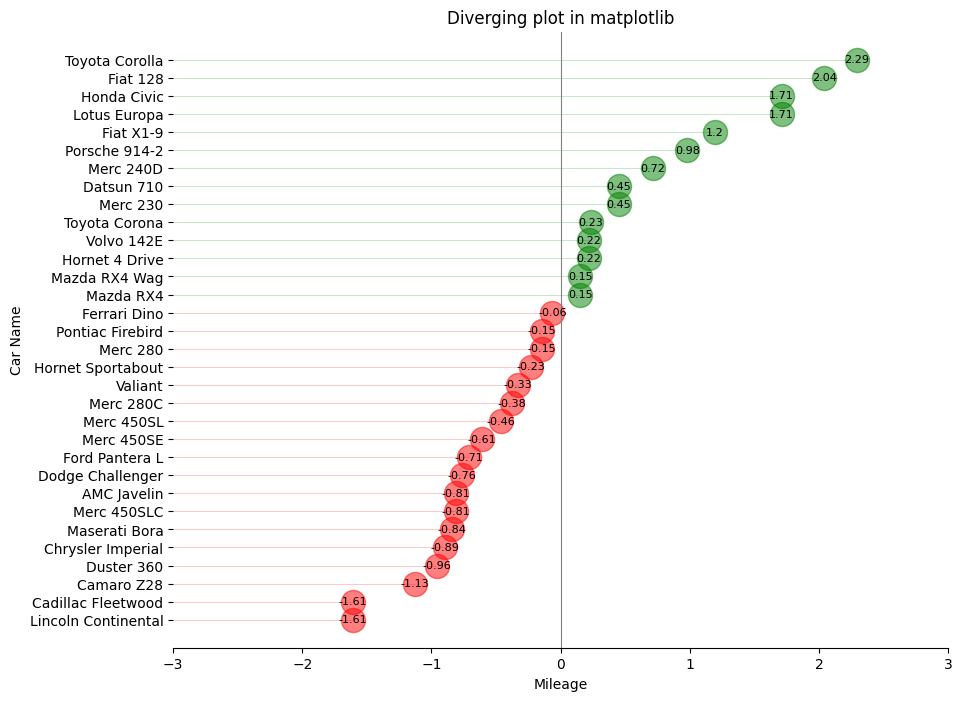

In [1]:
from imports import *
df = pd.read_csv('../data/mtcars.csv')

# More info:
# https://statisticsbyjim.com/glossary/standardization/
df['x_plot'] = (df['mpg'] - df['mpg'].mean())/df['mpg'].std()

# sort value and reset the index
df.sort_values('x_plot', inplace=True)
df.reset_index(inplace=True)

# create a color list, where if value is above > 0 it's green otherwise red
color = ['red' if x < 0 else 'green' for x in df['x_plot']]

fig = plt.figure(figsize= (10, 8))
ax = fig.add_subplot()

# iterate over x and y and annotate text and plto the data
for x, y in zip(df['x_plot'], df.index):
    # make a horizontal line from the y till the x value
    # this doesn't appear in the original 50 plot challenge
    ax.hlines(y = y,
              xmin= -3,
              xmax = x,
              linewidth = 0.5,
              alpha = 0.3,
              color = 'red' if x < 0 else 'green')
    
    # annotate text
    ax.text(x,
            y,
            round(x, 2), 
            color='black',
            horizontalalignment='center',
            verticalalignment='center',
            size = 8)
    
    # plot the points
    ax.scatter(x,
               y,
               color = 'red' if x< 0 else 'green',
               s = 300,
               alpha = 0.5)

# set title
ax.set_title('Diverging plot in matplotlib')

# change x lim
ax.set_xlim(-3, 3)

# set labels
ax.set_xlabel('Mileage')
ax.set_ylabel('Car Name')

ax.set_yticks(df.index)
ax.set_yticklabels(df.model)

ax.spines['top'].set_color('None')
ax.spines['left'].set_color('None')

ax.spines['right'].set_position(('data', 0))
ax.spines['right'].set_color('grey')